To Explore Unsupervised Machine Learning

In this clustering task we will predict the optimum number of clusters using Elbow method.

In [13]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

In [14]:
#Loading dataset
iris=datasets.load_iris()

In [15]:
df=pd.DataFrame(iris['data'])
print(df.head())

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2


In [16]:
# To see the number of groups of data
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
#Running K-Means with range of k
distortions=[]
K=range(1,10)

for k in K:
    KMeanmodel=KMeans(n_clusters=k,random_state=10)
    KMeanmodel.fit(df)
    distortions.append(KMeanmodel.inertia_)

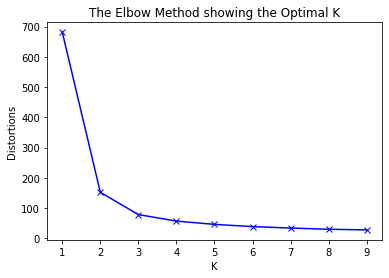

In [18]:
#Plotting the Distorsions of K-Means
plt.plot(K,distortions,'bx-')
plt.xlabel('K')
plt.ylabel('Distortions')
plt.title("The Elbow Method showing the Optimal K")
plt.show()

In [19]:
#Running K-Means using n_cluster=3
KMeanmodel=KMeans(n_clusters=3,random_state=10)
KMeanmodel.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'K_Means')

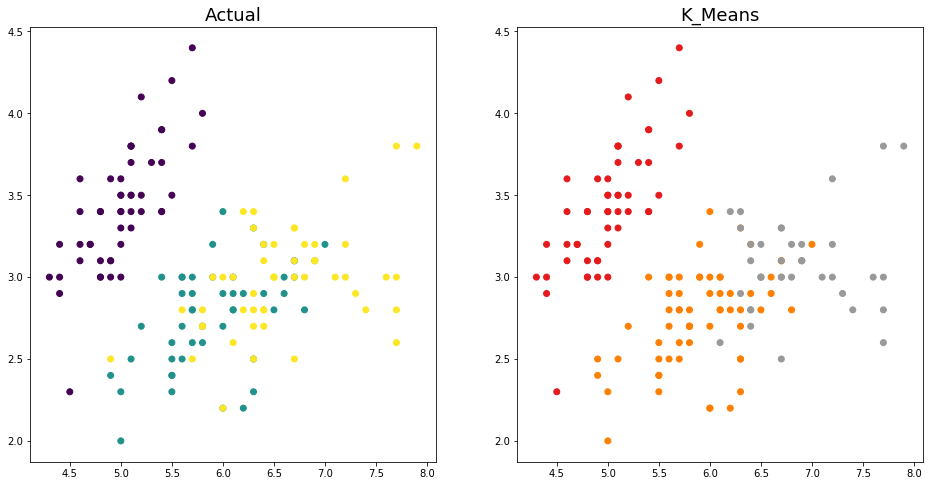

In [20]:
#KMeans Vs Actual for n_cluster=3
df['K_means']=KMeanmodel.predict(df)
df['target']=iris['target']

fig,axes=plt.subplots(1,2,figsize=(16,8))
axes[0].scatter(df[0],df[1],c=df['target'])
axes[1].scatter(df[0],df[1],c=df['K_means'],cmap=plt.cm.Set1)
axes[0].set_title('Actual',fontsize=18)
axes[1].set_title('K_Means',fontsize=18)